In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/train.csv')

In [3]:
set(list(train_data.Country_Region))

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [4]:
train_data[train_data.Province_State.notnull()]['Province_State'].value_counts()

Texas         67320
Georgia       42240
Virginia      35376
Kentucky      31944
Missouri      30888
              ...  
Hainan          264
Gansu           264
Jiangsu         264
Victoria        264
Montserrat      264
Name: Province_State, Length: 133, dtype: int64

In [5]:
train_data[train_data.Province_State.notnull()]['Country_Region'].value_counts()

US                844008
China               8712
Canada              3168
France              2640
United Kingdom      2640
Australia           2112
Netherlands         1056
Denmark              528
Name: Country_Region, dtype: int64

In [6]:
train_data.query('Country_Region=="Chad"')['Date'].value_counts()

2020-04-26    2
2020-05-13    2
2020-02-17    2
2020-03-16    2
2020-04-16    2
             ..
2020-05-21    2
2020-05-23    2
2020-04-02    2
2020-05-11    2
2020-01-29    2
Name: Date, Length: 132, dtype: int64

In [7]:
train_data = pd.read_csv('data/train.csv')

train_data = train_data[['Country_Region', 'Population',
       'Weight', 'Date', 'Target', 'TargetValue']]

cc_data = train_data[train_data['Target']=='ConfirmedCases'][['Country_Region', 'Population','Weight', 'Date','TargetValue']]
f_data = train_data[train_data['Target']=='Fatalities'][['Country_Region', 'Population','Weight', 'Date','TargetValue']]

f_data.describe()

,Population,Weight,TargetValue
count,4.571160e+05,457116.000000,457116.000000
mean,2.720127e+06,0.965218,1.319908
std,3.477773e+07,0.175551,28.767670
min,8.600000e+01,0.474908,-1918.000000
25%,1.213300e+04,0.864488,0.000000
50%,3.053100e+04,0.968379,0.000000
75%,1.056120e+05,1.063404,0.000000
max,1.395773e+09,2.239186,4591.000000


In [8]:
cc_data.describe()

,Population,Weight,TargetValue
count,4.571160e+05,457116.000000,457116.000000
mean,2.720127e+06,0.096522,22.328864
std,3.477773e+07,0.017555,407.011027
min,8.600000e+01,0.047491,-10034.000000
25%,1.213300e+04,0.086449,0.000000
50%,3.053100e+04,0.096838,0.000000
75%,1.056120e+05,0.106340,0.000000
max,1.395773e+09,0.223919,36163.000000


In [9]:
nb_countries = len(set(cc_data['Country_Region']))
print(f'In this dataset {nb_countries} countries are included.')

In this dataset 187 countries are included.


In [10]:
cc_data['Country_Region'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Afghanistan
2         Afghanistan
4         Afghanistan
6         Afghanistan
8         Afghanistan
             ...     
914222       Zimbabwe
914224       Zimbabwe
914226       Zimbabwe
914228       Zimbabwe
914230       Zimbabwe
Name: Country_Region, Length: 457116, dtype: object>

In [11]:
grouped_cc = cc_data.groupby(['Country_Region', 'Date'])
grouped_cc = grouped_cc.apply(lambda x: x[x['TargetValue']>0]).reset_index(drop=True)
first_infections = grouped_cc.groupby('Country_Region').nth(0)
first_occ= dict(first_infections['Date'].value_counts().sort_index(ascending=True))

In [12]:
countries = []
for day in range(0,55):
    affected_countries = list(list(first_infections.groupby(['Date']).groups.values())[day])
    countries.append(affected_countries)
    


In [13]:
grouped_f = f_data.groupby(['Country_Region', 'Date'])
grouped_f = grouped_f.apply(lambda x: x[x['TargetValue']>0]).reset_index(drop=True)
first_fatility = grouped_f.groupby('Country_Region').nth(0)
first_focc= dict(first_fatility['Date'].value_counts().sort_index(ascending=True))

In [14]:
fcountries = []
for day in range(0,65):
    affected_countries = list(list(first_fatility.groupby(['Date']).groups.values())[day])
    fcountries.append(affected_countries)

In [15]:
## extracting more info from dates
cc_data['Week'] = pd.to_datetime(cc_data['Date']).dt.week
cc_data['Day'] =  pd.to_datetime(cc_data['Date']).dt.day
cc_data['Weekday'] = pd.to_datetime(cc_data['Date']).dt.dayofweek
# later also add date since first infection

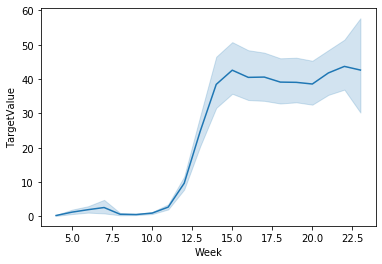

In [16]:
import seaborn as sns

sns.lineplot(cc_data['Week'], cc_data['TargetValue'])

In [17]:
train_data = pd.read_csv('data/train.csv')
print(len(train_data))
# discovered negative numbers, hence fixing negative numbers
train_data['TargetValue'] = train_data['TargetValue'].abs()
# checking null values for target_value
train_data = train_data[train_data.Province_State.isnull()]
train_data = train_data[['Country_Region', 'Population', 'Weight', 'Date', 'Target', 'TargetValue']]
print(len(train_data))

914232
49368


In [18]:
train_data = pd.read_csv('data/train.csv')

In [19]:
train_data[train_data.Province_State.notnull()].head() #['Province_State'].value_counts()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
2112,2241,NaN,Australian Capital Territory,Australia,426709,0.077138,2020-01-23,ConfirmedCases,0.0
2113,2242,NaN,Australian Capital Territory,Australia,426709,0.771375,2020-01-23,Fatalities,0.0
2114,2243,NaN,Australian Capital Territory,Australia,426709,0.077138,2020-01-24,ConfirmedCases,0.0
2115,2244,NaN,Australian Capital Territory,Australia,426709,0.771375,2020-01-24,Fatalities,0.0
2116,2245,NaN,Australian Capital Territory,Australia,426709,0.077138,2020-01-25,ConfirmedCases,0.0


In [20]:
train_data[train_data.Province_State.notnull()]['Country_Region'].value_counts()

US                844008
China               8712
Canada              3168
France              2640
United Kingdom      2640
Australia           2112
Netherlands         1056
Denmark              528
Name: Country_Region, dtype: int64

In [21]:
train_data.query('Country_Region=="China"')['Date'].value_counts()

2020-05-25    68
2020-02-19    68
2020-04-21    68
2020-01-26    68
2020-03-28    68
              ..
2020-02-06    68
2020-01-25    68
2020-03-14    68
2020-04-14    68
2020-03-25    68
Name: Date, Length: 132, dtype: int64

So it seems that some countries are represented more in the data due to the fact that their counties and provinces appear in the data aswell. This changes the importance of these countries with more presence than the other countries.

In [22]:
train_data.query('Country_Region=="China"')['Population'].value_counts()

5980000       264
1395773400    264
15570000      264
36820000      264
24450000      264
48010000      264
59020000      264
6820000       264
100060000     264
75200000      264
83020000      264
649100        264
39110000      264
21710000      264
46220000      264
111690000     264
27170000      264
95590000      264
80290000      264
7324300       264
48850000      264
25290000      264
37890000      264
43690000      264
3370000       264
9170000       264
38350000      264
62550000      264
56570000      264
26260000      264
35550000      264
24180000      264
30750000      264
68600000      264
Name: Population, dtype: int64